<h1>Sales Analysis</h1>

<h3>import Necessary libraries</h3>

In [165]:
import os
import pandas as pd


<h3>task 1:merge the 12 months of sales data into a single csv file</h3>

In [166]:
df=pd.read_csv("/kaggle/input/analysis/Sales_April_2019.csv")
###df.head()
files=[file for file in os.listdir('/kaggle/input/analysis')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("/kaggle/input/analysis/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
    all_months_data.to_csv("all_data.csv",index=False)

<h3>Read in updated dataframe</h3>

In [167]:
all_data=pd.read_csv("/kaggle/working/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


<h3>clean up the data</h3>

<h3>drop rows of NaN</h3>

In [168]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


<h3>Find 'Or' and delete it</h3>

In [169]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


### convert columns to the correct type

In [170]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) # Make float



<h3>Augment data with additional columns</h3>

<h3>task 2: Add Month Column
</h3>

In [171]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


<h3>task 3: Add a sales column</h3>

In [172]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


### task 4: add a city column


In [173]:
# let's use .apply()
def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


<h3>Question 1: what was the best month for sales? How much was earned that month?</h3>

In [174]:
results=all_data.groupby('Month').sum()


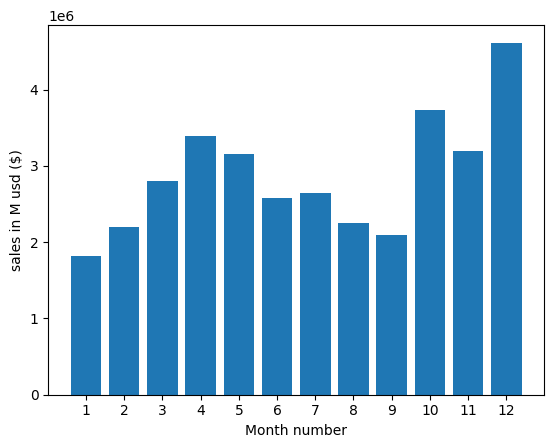

In [175]:
import matplotlib.pyplot as plt

months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('sales in M usd ($)')
plt.xlabel('Month number')
plt.show()

### question 2: what city had the highest number of sales

In [176]:
results=all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),2366852366992367032367142367172367192367442367...,Apple Airpods HeadphonesAA Batteries (4-pack)B...,16602,2779908.20,08/23/19 19:2908/20/19 21:0708/08/19 06:0908/3...,"238 Highland St, Atlanta, GA 30301763 Hill St,...",104794,2795498.58
Austin (TX),2367052367102367492367522367732367742367952368...,AA Batteries (4-pack)Macbook Pro LaptopAAA Bat...,11153,1809873.61,08/11/19 22:2108/04/19 02:4608/30/19 20:1308/2...,"27 North St, Austin, TX 73301654 Chestnut St, ...",69829,1819581.75
Boston (MA),2366812366912367122367262367352367392367412367...,AA Batteries (4-pack)USB-C Charging CableAA Ba...,22528,3637409.77,08/26/19 20:5208/23/19 07:3408/30/19 07:1408/2...,"295 1st St, Boston, MA 02215916 Meadow St, Bos...",141112,3661642.01
Dallas (TX),2366712366832366862366982367022367112367202367...,Bose SoundSport Headphones27in FHD MonitorAAA ...,16730,2752627.82,08/15/19 15:1108/31/19 15:4708/15/19 19:1308/0...,"492 Ridge St, Dallas, TX 75001196 West St, Dal...",104620,2767975.40
Los Angeles (CA),2366732366762366792366882367002367072367362367...,AA Batteries (4-pack)34in Ultrawide MonitorMac...,33289,5421435.23,08/29/19 20:5908/04/19 19:5208/07/19 15:4308/0...,"631 2nd St, Los Angeles, CA 90001470 Cherry St...",208325,5452570.80
New York City (NY),2366742366842366872366942366962367232367272367...,AA Batteries (4-pack)Lightning Charging CableU...,27932,4635370.83,08/15/19 19:5308/09/19 16:5008/23/19 12:5408/1...,"736 14th St, New York City, NY 10001669 12th S...",175741,4664317.43
Portland (ME),2367282367512368152368662368912369002369662372...,ThinkPad Laptop27in 4K Gaming Monitor27in FHD ...,2750,447189.25,08/10/19 11:2108/03/19 09:1808/28/19 17:5508/1...,"526 North St, Portland, ME 04101534 Washington...",17144,449758.27
Portland (OR),2366722366822366932367152367682367722368422368...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,11303,1860558.22,08/06/19 14:4008/19/19 12:4008/12/19 21:5708/2...,"149 7th St, Portland, OR 97035118 Johnson St, ...",70621,1870732.34
San Francisco (CA),2366752366772366782366802366892366902366922366...,Wired Headphones20in MonitorWired HeadphonesLG...,50239,8211461.74,08/02/19 23:5408/13/19 07:1608/25/19 20:1108/0...,"470 Hill St, San Francisco, CA 94016918 6th St...",315520,8262203.91


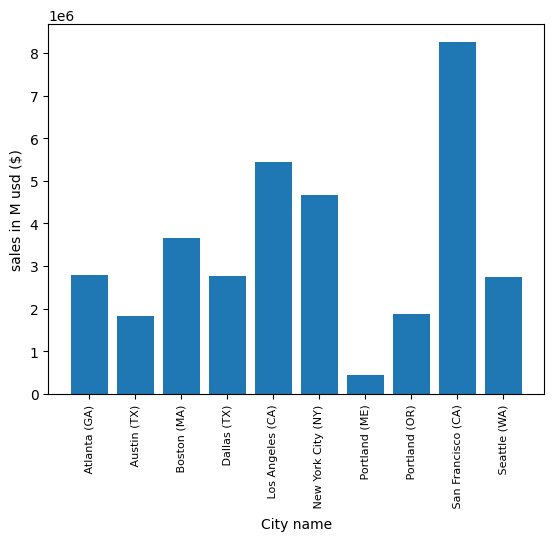

In [177]:
import matplotlib.pyplot as plt

cities=[city for city, df in all_data.groupby('City') ]

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in M usd ($)')
plt.xlabel('City name')
plt.show()

### Question 3: what time should we display advertisement to maximize likelihood of customer's buying product?

In [178]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [179]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53


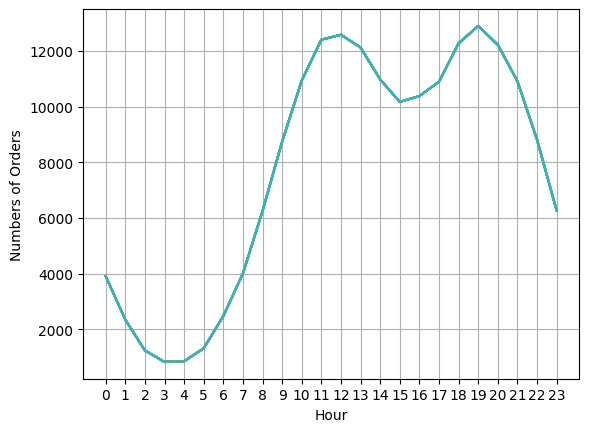

In [180]:
hours=[hour for hour, df in all_data.groupby('Hour') ]
plt.plot(hours, all_data.groupby(['Hour']).count())
###all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Numbers of Orders')
plt.grid()
plt.show()
###my recommendations are around 12am or 7pm

### QUestion 4: what products are most sold toguether?

In [181]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=  df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)


/tmp/ipykernel_42/2146017761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=  df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
2696,239253,"34in Ultrawide Monitor,Wired Headphones"
2702,239258,"AA Batteries (4-pack),AAA Batteries (4-pack)"
2704,239259,"Vareebadd Phone,Flatscreen TV"
2736,239290,"Wired Headphones,34in Ultrawide Monitor"


In [192]:
### counting unique pairs of numbers into a python dictionary
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: what product sold the most?and why?

In [193]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53


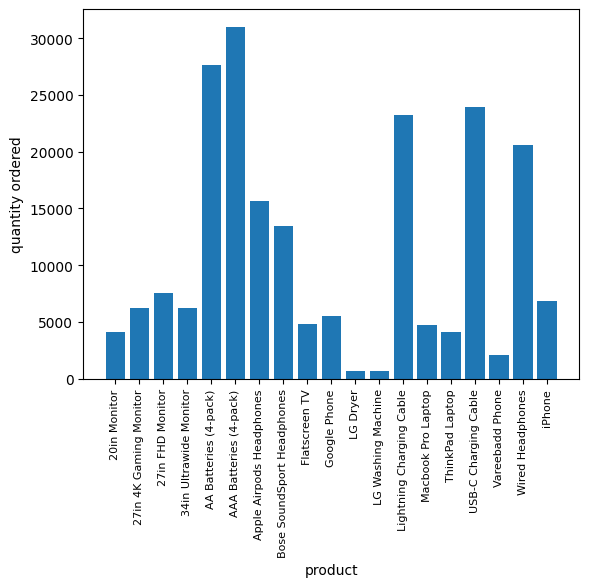

In [220]:
product_group = all_data.groupby('Product')['Quantity Ordered']
quantity_ordered=product_group.sum(['Quantity Ordered'])
products=[product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel('quantity ordered')
plt.xlabel('product')

plt.xticks(products,rotation='vertical',size=8)
plt.show()

/tmp/ipykernel_42/4184118119.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


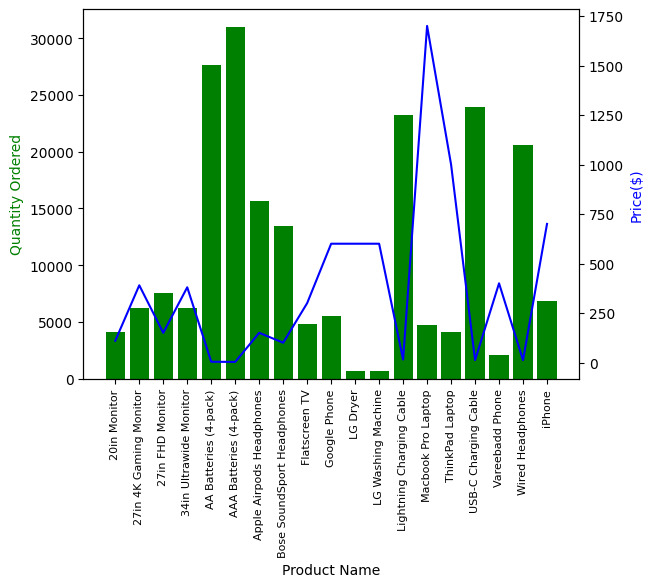

In [233]:
prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

